In [170]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
import re

In [171]:

df = pd.read_csv('DataTrain.csv')
df.head()

,id,text,sentiment,date,time,Measure of Evidence Strength of sent message,sent message address,received message address,sender age,Message Channel,sender gender,receiver gender
0,379,lucky! that`s awesome,positive,2014-11-22,17:26:20,0.901658,"901 Darren Junction Apt. 862\nWest Carlaland, ...","2002 Jackson Ridges\nNew Kevinchester, MA 86337",44,email,male,male
1,24124,Im glad i can make sumone smile,positive,2018-07-22,07:58:08,0.012167,Unit 5916 Box 9073\nDPO AE 63754,"77157 Fletcher Walk\nSouth Hollyfurt, VI 34801",34,chat app,male,male
2,4286,My teratoma has a cavity and is experiencing m...,negative,2015-06-26,02:52:12,0.603517,"56947 Brooks Loop\nSouth John, WV 93156","8471 Marco Village\nNew Jennifer, AL 91049",13,,male,female
3,1783,On JACkSOnVILLe be@Ch wAlkiNG in The COLD ****...,negative,2020-12-05,23:53:36,0.814155,"918 Sims River\nNormaland, AL 09337","6473 Oneal River\nLake Stephaniemouth, AZ 15555",77,email,female,female
4,5581,Kpai,positive,2018-07-15,03:49:50,0.684390,"7721 Rebecca Squares\nEast Michaelton, VA 57699","07031 Lauren Spur Apt. 500\nLake Michelle, LA ...",75,email,male,male


In [172]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
def remove_urls(text):
    return re.sub(url_pattern, '', text)


In [173]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import wordninja
import contractions
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
def remove_urls(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\\(\\),\'\’:;]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text_without_urls = re.sub(url_pattern, '', text)
    text_without_special_characters = ' '.join(re.findall(r'\b\w+\b', text_without_urls))
    return text_without_special_characters


# Function to remove emojis from text
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emojis in emoticons
                               u"\U0001F300-\U0001F5FF"  # Other emojis & symbols
                               u"\U0001F680-\U0001F6FF"  # Transport & map symbols
                               u"\U0001F700-\U0001F77F"  # Alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric shapes
                               u"\U0001F800-\U0001F8FF"  # Supplemental symbols and pictographs
                               u"\U0001F900-\U0001F9FF"  # Supplemental symbols and pictographs
                               u"\U0001FA00-\U0001FA6F"  # Supplemental symbols and pictographs
                               u"\U0001FA70-\U0001FAFF"  # Supplemental symbols and pictographs
                               u"\U0001F004-\U0001F0CF"  # Additional emoticons
                               u"\U0001F170-\U0001F251"  # Enclosed characters
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_repeated_tokens(tokens):
    # Create an empty set to store unique tokens
    unique_tokens = set()

    # Initialize a list to store non-repeated tokens
    cleaned_tokens = []

    # Iterate through the tokens in reverse order (to preserve the order of the first occurrence)
    for token in reversed(tokens):
        # If the token is not in the set of unique tokens, add it to the cleaned_tokens list and the set
        if token not in unique_tokens:
            cleaned_tokens.append(token)
            unique_tokens.add(token)

    # Reverse the cleaned_tokens list to maintain the original order
    return list(reversed(cleaned_tokens))




def reduce_string(text):
    pattern= re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1",text)


df['text'] = df['text'].apply(reduce_string)

df['text'] = df['text'].apply(remove_emojis)

# # Lowercase and remove punctuation
# Function to perform efficient spelling correction using TextBlob
def efficient_spelling_correction(text):
    # Create a TextBlob object from the text
    blob = TextBlob(text)

    # Correct spelling with a limited suggestion count
    corrected_text = blob.correct()

    return str(corrected_text)


# replace_special_characters
def replace_special_characters(text):
    text = text.replace("'", "")

    # Replace '@' with 'a'
    text = text.replace('@', 'a')
    # Replace '$' with 's'
    text = text.replace('$', 's')
    text = text.replace('2nite', 'tonight')
    text = text.replace('app', 'application')
    text = text.replace('nite', 'tonight')
    text = text.replace('ive', "i have")
    text = text.replace('hve', "i have")
    text = text.replace('happlicationy', "happy")
    text = text.replace('dy', "day")
    text = text.replace('ill', "i will")
    text = text.replace('cant', "can not")
    text = text.replace('isnt', "is not")
    text = text.replace('cnt', "can not")
    text = text.replace('didnt', "did not")
    text = text.replace('tsk', "task")
    text = text.replace('gon', "going to")
    text = text.replace('mom', "mother")
    text = text.replace('dont', "do not")
    return text

df['text'] = df['text'].str.lower().str.replace(r'[^a-z\s]', '')
df['text'] = df['text'].str.lower().str.replace('_', ' ').str.strip()
df['text'] = df['text'].str.lower().str.replace('-', '')
df['text'] = df['text'].str.lower().str.replace('.', '')
df['text'] = df['text'].str.lower().str.replace("'", '')
df['text'] = df['text'].apply(remove_urls)

# df['text'] = df['text'].apply(efficient_spelling_correction)
df['tokens'] = df['text'].apply(lambda x: wordninja.split(x) if ' ' not in x else word_tokenize(x))


# Function to remove words containing digits
def remove_words_with_digits(word):
    return re.sub(r'\w*\d\w*', '', word)

df['tokens'] = df['tokens'].apply(lambda x: [remove_words_with_digits(word) for word in x])
df['tokens'] = df['tokens'].apply(lambda x: [reduce_string(word) for word in x])
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word != ''])
df['tokens'] = df['tokens'].apply(remove_repeated_tokens)

def split_long_words(word):
    if len(word) > 10:
        return wordninja.split(word)
    else:
        return [word]  # Return the word as a list


# Apply the function to the 'tokens' column
df['tokens'] = df['tokens'].apply(lambda x: [word for token in x for word in split_long_words(token)])
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if len(word) > 2])


df['tokens'] = df['tokens'].apply(lambda x: [replace_special_characters(word) for word in x])

# Stopword removal
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])



# Lemmatizationhttps://file+.vscode-resource.vscode-cdn.net/home/wr/nltk_data...
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-173-25d7279617fe>:103: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.lower().str.replace(r'[^a-z\s]', '')
<ipython-input-173-25d7279617fe>:106: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.lower().str.replace('.', '')


In [174]:
# Specify the path and filename for the cleaned CSV file
cleaned_csv_filename = 'cleaned_dataset_1.csv'

# Save the DataFrame with the cleaned data to a new CSV file
df.to_csv(cleaned_csv_filename, index=False)

print(f"Cleaned data saved to {cleaned_csv_filename}")

Cleaned data saved to cleaned_dataset_1.csv


In [175]:
# Preprocess 'sender age' column
df['sender age'].fillna(30, inplace=True)
df.head()

,id,text,sentiment,date,time,Measure of Evidence Strength of sent message,sent message address,received message address,sender age,Message Channel,sender gender,receiver gender,tokens
0,379,lucky thats awesome,positive,2014-11-22,17:26:20,0.901658,"901 Darren Junction Apt. 862\nWest Carlaland, ...","2002 Jackson Ridges\nNew Kevinchester, MA 86337",44,email,male,male,"[lucky, thats, awesome]"
1,24124,im glad i can make sumone smile,positive,2018-07-22,07:58:08,0.012167,Unit 5916 Box 9073\nDPO AE 63754,"77157 Fletcher Walk\nSouth Hollyfurt, VI 34801",34,chat app,male,male,"[glad, make, sumone, smile]"
2,4286,my teratoma has a cavity and is experiencing m...,negative,2015-06-26,02:52:12,0.603517,"56947 Brooks Loop\nSouth John, WV 93156","8471 Marco Village\nNew Jennifer, AL 91049",13,,male,female,"[teratoma, cavity, experiencing, male, pattern..."
3,1783,on jacksonville bech walking in the cold wter ...,negative,2020-12-05,23:53:36,0.814155,"918 Sims River\nNormaland, AL 09337","6473 Oneal River\nLake Stephaniemouth, AZ 15555",77,email,female,female,"[jacksonvi wille, bech, walking, cold, wter, i..."
4,5581,kpai,positive,2018-07-15,03:49:50,0.684390,"7721 Rebecca Squares\nEast Michaelton, VA 57699","07031 Lauren Spur Apt. 500\nLake Michelle, LA ...",75,email,male,male,[kpa]


In [176]:
# Preprocess 'sender gender' column (Label Encoding)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
df['sender gender'] = label_encoder.fit_transform(df['sender gender'])
df['receiver gender'] = label_encoder.fit_transform(df['receiver gender'])



In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

label_mapping = {'positive': 1, 'neutral': 0 , 'negative': 2}
df['sentiment'] = df['sentiment'].map(label_mapping)
missing_values = df['sentiment'].isnull().sum()
print(f"Number of missing values in 'sentiment' column: {missing_values}")


Number of missing values in 'sentiment' column: 0


In [178]:
df.dropna(subset=['sentiment'], inplace=True)

In [179]:
label_encoder = LabelEncoder()
df['Message Channel'] = label_encoder.fit_transform(df['Message Channel'])

In [180]:
  # # Train-test split
  # X_train, X_test, y_train, y_test = train_test_split(
  #     df[['text', 'sender age', 'sender gender', 'Message Channel']],
  #     df['sentiment'],
  #     test_size=0.2,
  #     random_state=42
  # )

  # # Text vectorization using TF-IDF
  # tfidf_vectorizer = TfidfVectorizer(max_features=1000)
  # X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])
  # X_test_tfidf = tfidf_vectorizer.transform(X_test['text'])

  # # Combine TF-IDF features with 'sender age', 'sender gender', and 'Message Channel'
  # from scipy.sparse import hstack
  # X_train_combined = hstack((X_train_tfidf, X_train[['sender age', 'sender gender', 'Message Channel']].values))
  # X_test_combined = hstack((X_test_tfidf, X_test[['sender age', 'sender gender', 'Message Channel']].values))
  # model = LogisticRegression()
  # model.fit(X_train_combined, y_train)

  # # Model prediction
  # y_pred = model.predict(X_test_combined)



In [181]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error
# Train-test split using only 'text' and 'sentiment'
X_train, X_test, y_train, y_test = train_test_split(
    df['text'],  # Use only the 'text' feature
    df['sentiment'],  # Use 'sentiment' as the target variable
    test_size=0.2,
    random_state=42
)

# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model training (XGBoost)
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_tfidf, y_train)

# Model prediction
y_pred = xgb_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Accuracy: 62.48%
Mean Squared Error (MSE): 0.9193


In [184]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


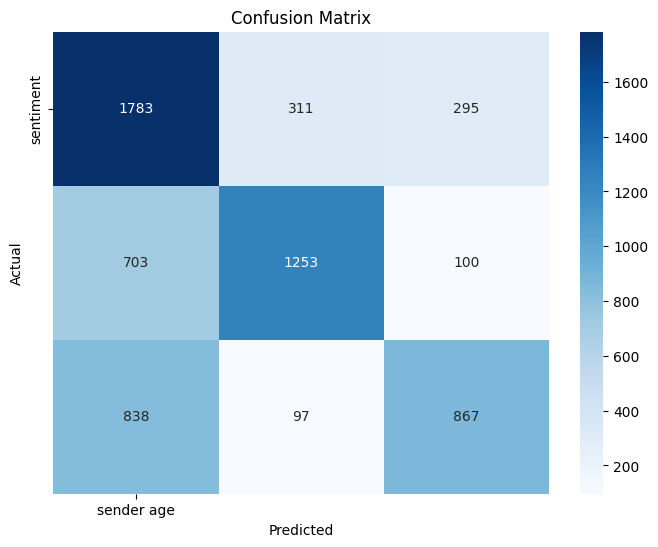

In [182]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['sender age'], yticklabels=['sentiment'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

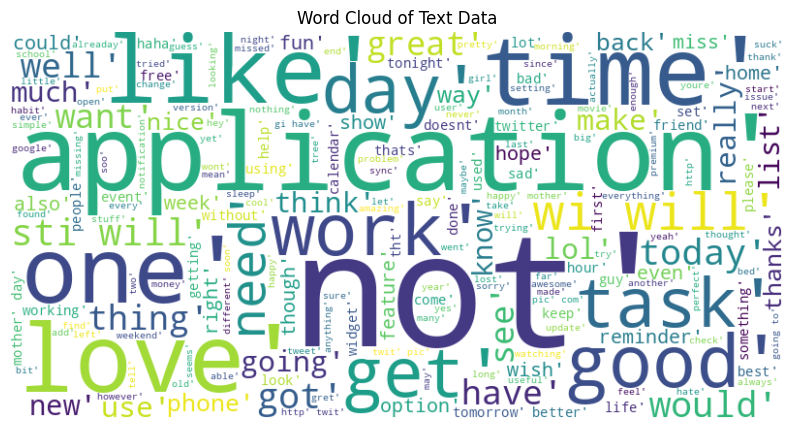

In [183]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string
df = pd.read_csv('cleaned_dataset_1.csv')

text_combined = ' '.join(df['tokens'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

AttributeError: ignored